In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.integrate import trapz

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({'font.size': 24})

In [18]:
# Define parameters

na = 3
G = 0.7
U = 1/na
κ =  1
ϵ = 0.0*np.sqrt(na)
Δ = 0
k2 = 0.0/na

N = 15

nvals = np.arange(1, 8)
Δvals = np.arange(0, 3, 0.2)

a = destroy(N)
n = num(N)
x = (a + a.dag())/np.sqrt(2)
p = -1j*(a - a.dag())/np.sqrt(2)

H = (G/2) * (a**2 + a.dag()**2) + (U/2)*a.dag()**2 * a**2 + 1j*ϵ*(a - a.dag()) - Δ*a.dag()*a
L = np.sqrt(κ)*a

rhoss = steadystate(H, [L])
rhovec = operator_to_vector(rhoss)

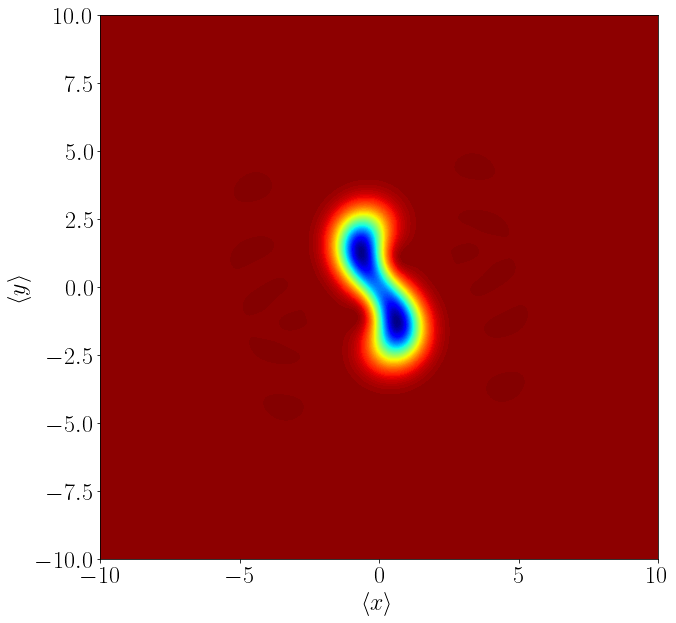

In [19]:
# Get wigner function
X = np.linspace(-10, 10, 300)
P = np.linspace(-10, 10, 300)

XX, PP = np.meshgrid(X, P)

w = wigner(rhoss, X, P)

plt.figure(figsize=(10,10))

lvls = 100
fs = 24
plt.contourf(X, P, w, cmap='jet_r', alpha=1, levels=lvls)
# plt.contour(X, P, w, cmap='bone', alpha=1, levels=lvls, vmin=0.02, vmax=np.max(w), linewidths=1)
# plt.xlim([-15,15])
# plt.ylim([-5,5])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.xlabel(r'$\langle x \rangle$', fontsize=fs)
plt.ylabel(r'$\langle y \rangle$', fontsize=fs)

plt.show()

In [20]:
def tilted_liouvillian(H, L, chi, v):
    
    # Only works for one jump operator
    
    H_vec = spre(H) - spost(H)
    L_vec = np.exp(1j*chi*v)*to_super(L) - 0.5*(spre(L.dag() * L) + spost(L.dag()*L))
    
    return -1j*H_vec + L_vec

In [21]:
# Create chi space
chi = np.linspace(-np.pi, np.pi, 100)
dchi = chi[1]-chi[0]

t = [5, 10, 20, 30]

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, L, i, 1) for i in chi]
rhochi = [[vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rhochi])

In [22]:
# Compute n vals
n = np.arange(0, 200)

Pnt = np.abs([trapz(np.exp(-1j*ni*chi)*pchis, chi, dx=dchi, axis=1) for ni in n])/(2*np.pi)


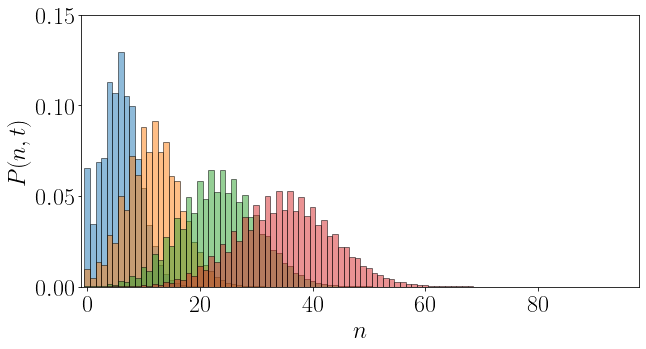

In [24]:
fig = plt.figure(figsize=(10, 5))

plt.bar(n, Pnt.T[0], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, Pnt.T[1], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, Pnt.T[2], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, Pnt.T[3], width = 1, alpha=0.5, edgecolor = 'k')

plt.xlim([-1,98])
plt.ylim([0, 0.15])

# plt.text(5, 0.12, r'$\kappa t=5$')
# plt.text(20, 0.09, r'$\kappa t=10$')
# plt.text(40, 0.07, r'$\kappa t=20$')
# plt.text(70, 0.06, r'$\kappa t=30$')

plt.xlabel(r'$n$')
plt.ylabel(r'$P(n,t)$')


plt.show()

# fig.savefig('Pnt_exampleD.png', dpi=200, bbox_inches='tight')